## Basic Winner Prediction

To start the project we will try to predict the winner of a game (white win, black win or draw). This type of prediction have already been made a thousand times but this is a good start for our project.

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings

warnings.filterwarnings('ignore')

df_games = pd.read_csv("CSV_Output/games_cleaned.csv")
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19113 entries, 0 to 19112
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              19113 non-null  object 
 1   rated           19113 non-null  bool   
 2   created_at      19113 non-null  float64
 3   last_move_at    19113 non-null  float64
 4   turns           19113 non-null  int64  
 5   victory_status  19113 non-null  object 
 6   winner          19113 non-null  object 
 7   increment_code  19113 non-null  object 
 8   white_id        19113 non-null  object 
 9   white_rating    19113 non-null  int64  
 10  black_id        19113 non-null  object 
 11  black_rating    19113 non-null  int64  
 12  moves           19113 non-null  object 
 13  opening_eco     19113 non-null  object 
 14  opening_name    19113 non-null  object 
 15  opening_ply     19113 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.2+ MB


### Setting up the dataset
We are going to keep only the player ratings and number of turns of the gamebecausse these are the most correlated feature to the winner feature

In [2]:
dataset = df_games[['turns', 'winner', 'white_rating', 'black_rating']]

### Building and testing the model



In [3]:
def randomForest(data): 
    y = data['winner']
    x = data.drop(['winner'], axis = 1)

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

    rfc = RandomForestClassifier(class_weight="balanced",  n_estimators=100, max_depth=None, random_state=42)
    rfc.fit(x_train, y_train)
    return rfc, x_test, y_test

rfc, x_test, y_test = randomForest(dataset)
y_pred = rfc.predict(x_test)

We can see below and accuracy of 66% of our model.

              precision    recall  f1-score   support

       black       0.66      0.69      0.67      1704
        draw       0.12      0.02      0.03       175
       white       0.70      0.73      0.72      1944

    accuracy                           0.68      3823
   macro avg       0.49      0.48      0.47      3823
weighted avg       0.66      0.68      0.67      3823



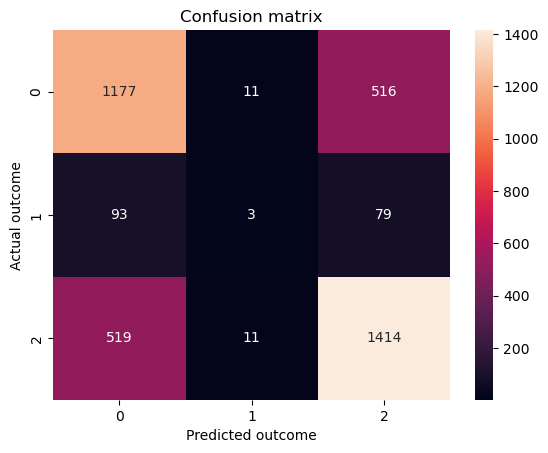

In [4]:
def confusionMatrixDisplay(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    heatmap = sns.heatmap(cm, annot=True, fmt='d')
    heatmap.set_title('Confusion matrix')
    heatmap.set_xlabel('Predicted outcome')
    heatmap.set_ylabel('Actual outcome')
    print(classification_report(y_test, y_pred))

confusionMatrixDisplay(y_test, y_pred)

This type of prediction is a basic way to predict the winner. We want to go further into the prediction and predict the outcome of the game, whether the white or black wins and how (mate, out of time, resignation).